In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**A-Data Generation:**

In [ ]:

ls1=[]
ls2=[]
for i in range(200):
  ls1.append(np.random.randint(15,35))
  ls2.append(np.random.randint(5,10))

Subject=pd.DataFrame({'English':ls1,'Math':ls1,'Science':ls1,'Grade':ls2})
Subject

,English,Math,Science,Grade
0,30,30,30,5
1,17,17,17,7
2,25,25,25,9
3,32,32,32,6
4,22,22,22,9
...,...,...,...,...
195,20,20,20,8
196,33,33,33,6
197,18,18,18,9
198,21,21,21,5


**B-pre Build Algorithm:**

In [ ]:
X = Subject.iloc[:, :-1].values
y = Subject.iloc[:,-1].values

In [ ]:
Subject

,English,Math,Science,Grade
0,30,30,30,5
1,17,17,17,7
2,25,25,25,9
3,32,32,32,6
4,22,22,22,9
...,...,...,...,...
195,20,20,20,8
196,33,33,33,6
197,18,18,18,9
198,21,21,21,5


In [ ]:
#split the data into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pre_build_y_pred = regressor.predict(X_test)



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train, cv=10)
print(scores)
print(
     f"CI Accuracy: "
     f"{round(scores.mean(), 2)} "
     f"(+/- {round(scores.std() * 2, 2)})"
)

[-0.04642018 -0.0517043  -0.05269275 -0.01072802  0.000417   -0.02869301
 -0.07956833 -0.06311476 -0.08029866 -0.00852243]
CI Accuracy: -0.04 (+/- 0.06)


In [ ]:
#Test score
print(f'model accuracy on test set: {regressor.score(X_test, y_test)}')

model accuracy on test set: 0.0069929159220707415


In [ ]:
#Train score
print(f'model accuracy on test set: {regressor.score(X_train, y_train)}')

model accuracy on test set: 0.0005427164949782792


In [ ]:
#pre-build slope,intercept and coefficient.
pr_coeff_df = pd.DataFrame(regressor.coef_,Subject.iloc[:,:-1].columns,columns=['Coefficient'])
print(coeff_df)
pr_intercept_df = pd.DataFrame(regressor.intercept_,Subject.iloc[:,:-1].columns,columns=['Intercept'])
print(intercept_df)
pr_slope_df = pd.DataFrame(regressor.coef_,Subject.iloc[:,:-1].columns,columns=['slope'])
print(pr_slope_df)


         Coefficient
English     0.001984
Math        0.001984
Science     0.001984
         Intercept
English   6.856019
Math      6.856019
Science   6.856019
            slope
English  0.001984
Math     0.001984
Science  0.001984


C.self-build algorithm:

In [ ]:
class RegressorMethod():
    def fit(self, X=None, y=None):
        self.y_bar_ = np.mean(y)
    def predict(self, X=None):
        return np.ones(X.shape[0]) * self.y_bar_
model = RegressorMethod()
model.fit(X_train, y_train)
self_build_y_pred=model.predict(X_test)    

In [ ]:
def score(self_build_y_pred,y_test):
      mse = np.sum((y_pred - y_test)**2)
      # root mean squared error
      # m is the number of training examples
      m=X_train.size
      rmse = np.sqrt(mse/m)
      ssr = np.sum((self_build_y_pred - y_test)**2)
      #  total sum of squares
      sst = np.sum((y_test - np.mean(y_test))**2)
      # R2 score
      r2_score = 1 - (ssr/sst)
      print('Root mean squared error: ', rmse)
      print('R2 score: ', r2_score)
score(self_build_y_pred,y_test)

Root mean squared error:  0.4906653633281398
R2 score:  -0.005370569280343629


In [ ]:
#calculate slope,intercept and co-efficient using self build algorithm
def getInterSlopeCoff(X,y):
      for i in range(0,len(Subject.iloc[:,:-1].columns)):
        xmean = np.mean(X)
        ymean = np.mean(y)
        x_xmean = X - xmean
        y_ymean = y - ymean
        covariance = sum(x_xmean * y_ymean)
        variance = sum(x_xmean * x_xmean)
        cofficients = sum((x_xmean)*(y_ymean)) / sum((x_xmean)**2)

      slope = covariance/variance
      #Alternate mmethod
      #for i in range(0,len(Subject.iloc[:,:-1].columns)):
      #slope=(((X[:,i]*y).mean() - X[:,i].mean()*y.mean()) / ((X[:,i]**2).mean() - (X[:,i].mean())**2))
      #slope_df=pd.DataFrame(slope,Subject.iloc[:,:-1].columns,columns=['slope'])
      #print(slope_df)
      intercept = ymean - (xmean * slope)
      return intercept, slope,cofficients
for i in range(0,len(Subject.iloc[:,:-1].columns)):
  print(getInterSlopeCoff(X[:,i],y))

(6.393189960696454, 0.02445607563276777, 0.02445607563276777)
(6.393189960696454, 0.02445607563276777, 0.02445607563276777)
(6.393189960696454, 0.02445607563276777, 0.02445607563276777)


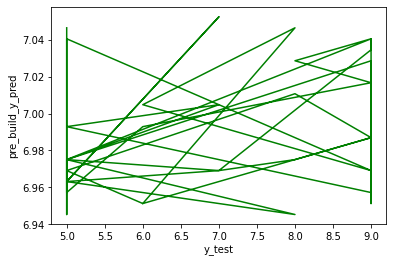

In [ ]:
#pre build algorithm graph
#plt.scatter(y_test, pr_y_pred, s=10)
plt.xlabel('y_test')
plt.ylabel('pre_build_y_pred')
plt.plot(y_test,pre_build_y_pred,color="G")


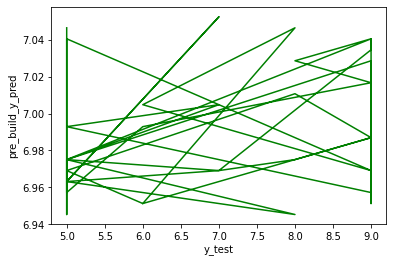

In [ ]:
#self build algorithm graph
#plt.scatter(y_test, y_pred, s=10)
plt.xlabel('y_test')
plt.ylabel('pre_build_y_pred')
plt.plot(y_test,pre_build_y_pred,color="G")